##### This notebook covers Investigations 5.10 from the Chapter 5 Section 4: Inference For Regression in ISCAM III

### Investigation 5.10: Running Out Of Time

Many communities offer racing events for amateur runners, such as 5K (approximately 3.1 miles) races.
At the end of the event, awards are often given out to runners with the fastest times, often to the top three
finishers in different age groups. But does running time really change with age for amateur runners? To
investigate this, one of the authors downloaded the race results for a local 5K race in May 2013
(Talley5K2013.txt). Data for 248 runners included age (in years) and finish time (in minutes).

In [10]:
import pandas as pd

# Save data URL
url = "http://www.rossmanchance.com/iscam2/data/Talley5K2013.txt"

# Use pandas to read in the data from the URL
runners = pd.read_csv(url, sep = "\s+")
runners.head()

,BIB,Name,Hometown,Gender,AgeRank,GenderRank,OverallRank,Time,Age
0,1538,"Ricketts, Christian","Grover Beach, Ca",M,1,1,1,16.18,13
1,1581,"Mccarty, Travis","Arroyo Grande, Ca",M,1,2,2,17.15,34
2,1679,"Bounds, Julia","Redwood City, Ca",F,1,1,3,18.80,14
3,91506,"Krichevsky, Daniel","San Luis Obispo, Ca",M,1,3,4,19.02,27
4,1591,"Shea, Owen","Slo, Ca",M,1,4,5,19.07,49


Use technology to produce a scatterplot of finish time vs. age. [You can copy the data into Excel,
using Data > Text to Columns and delimiting by spaces, and then copy the last two columns (age, time)
into the Analyzing Two Quantitative variables applet, using age as the explanatory variable.] Do you
want to change any of your answers to (b) in light of this graph? Also discuss any other unusual features
of the data.

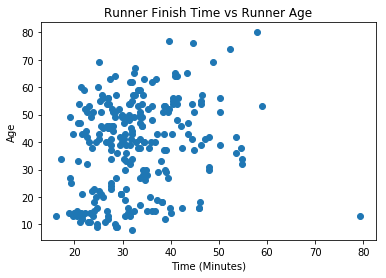

In [11]:
# Produce a scatterplot of finish time and age
import matplotlib.pyplot as plt
plt.scatter(runners.Time, runners.Age)
plt.title("Runner Finish Time vs Runner Age")
plt.xlabel("Time (Minutes)")
plt.ylabel("Age")
plt.show()

Remove the outlier (the name was a duplicate and the time was later dropped from the official
published results), and determine the least-squares regression equation for predicting finish time from
age. Interpret the slope coefficient in context.

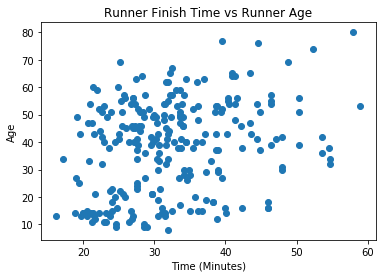

In [12]:
# Remove outlier from dataset
plausible_runners = runners['Time'] < 70
runners = runners[plausible_runners]
plt.scatter(runners.Time, runners.Age)
plt.title("Runner Finish Time vs Runner Age")
plt.xlabel("Time (Minutes)")
plt.ylabel("Age")
plt.show()

In [13]:
# Generate the ordinary least squares regression line and associated output
import statsmodels.formula.api as sm
reg = sm.ols(formula = "Time ~ Age", data = runners).fit()
print(reg.params), print(reg.summary())

# incredible!

Intercept    26.960993
Age           0.140322
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     20.13
Date:                Tue, 07 May 2019   Prob (F-statistic):           1.11e-05
Time:                        16:48:06   Log-Likelihood:                -871.15
No. Observations:                 247   AIC:                             1746.
Df Residuals:                     245   BIC:                             1753.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

(None, None)

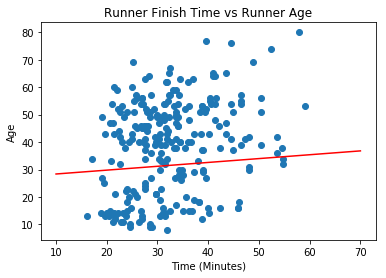

In [17]:
import numpy
x = numpy.linspace(10, 70, 500)
y = (reg.params[1]*x) + reg.params[0]
plt.scatter(runners.Time, runners.Age)
plt.plot(x, y, 'r')
plt.title("Runner Finish Time vs Runner Age")
plt.xlabel("Time (Minutes)")
plt.ylabel("Age")
plt.show()

### Randomization Example (ISCAM p. 376)
Page 376 of ISCAM walks students through an applet-based example where a null population is simulated (one in which the fitted regression line has a slope of zero). Here we'll mimic that simulation process and compare it to our observed data in Python.

In [18]:
# Set the population intercept to be equal to the mean of the time variable, 32.36. Because we are forcing the slope 
# coefficient beta_1 = 0, this says that the population regression line is constant at y_bar = 32.36 minutes.
beta_1 = 0
beta_0 = round(numpy.mean(runners.Time), 3)

# Set the x mean and x standard deviation to match the values for age after removing the outlier
x_mean = round(numpy.mean(runners.Age), 3)
x_std = round(numpy.std(runners.Age), 3)

# Set the value of sigma, representing the variability about the population regression line, to equal the value of s from 
# the regression model (should be smaller than the SD(Y) you found in (g)).
sigma = round(numpy.sqrt(reg.ssr / (len(runners.Age) - 2)), 3)

# We want to simulate two sets of normally distributed values. The first set is the x set, where we simulate x values with the
# sample mean and standard deviation for the Age variable. Then, we need to simulate y values based on sigma, the variability 
# about the regression line. The regression line has a slope of zero and is at y = time = beta_0 = 32.36.

# We'll want quite a few simulated pairs of values. We'll do 20,000.
# First, here are the y values (simulated null time values).
nulltimes = numpy.random.normal(loc = beta_0, scale = sigma, size = 20000)
# Then, the x values (simulated null age values).
nullages = numpy.random.normal(loc = x_mean, scale = x_std, size = 20000)

# Now, we have a simulated null dataset that we can plot and compare to observed data. Finally, pair the simulated null values
# and confirm that they were successfully generated.
nulldata = {'Time':nulltimes, 'Age':nullages}
nullrunners = pd.DataFrame(nulldata)
nullrunners.head()

,Time,Age
0,45.122570,50.862678
1,32.055104,55.376521
2,34.484528,59.441367
3,25.086956,41.926137
4,26.139229,39.738230


With the generated simulation of null values that share characteristics similar to our observed data, we can plot the null distribution and fit a regression line to it. We expect the fitted line to have slope of about zero, since that is our null hypothesis. 

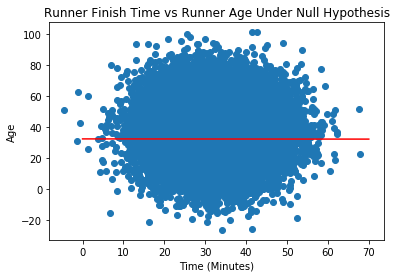

In [19]:
# Find least squares regression line for the null data, then plot the data and add the fitted line
nullreg = sm.ols(formula = "Time ~ Age", data = nullrunners).fit()
x = numpy.linspace(0, 70, 500)
y = (nullreg.params[1]*x) + nullreg.params[0]

plt.scatter(nullrunners.Time, nullrunners.Age)
plt.plot(x, y, 'r')
plt.title("Runner Finish Time vs Runner Age Under Null Hypothesis")
plt.xlabel("Time (Minutes)")
plt.ylabel("Age")
plt.show()

In [20]:
# We can confirm that the slope coefficient is basically zero by calling it from the regression model.
nullreg.params

Intercept    32.460364
Age          -0.002019
dtype: float64

With this simulated null population, we can now take many samples of the same size as our observed data and observe how the slope of the fitted regression lines behave.

In [21]:
# Pandas has an extraordinarily convenient sampling function that allows us to randomly choose rows from the null dataset.
firstsample = nullrunners.sample(n = 247)
firstsample.head()

,Time,Age
10965,37.240792,45.993426
11162,33.905357,41.814714
4763,42.488587,60.128517
16187,26.860592,17.042325
8430,43.069072,28.898127


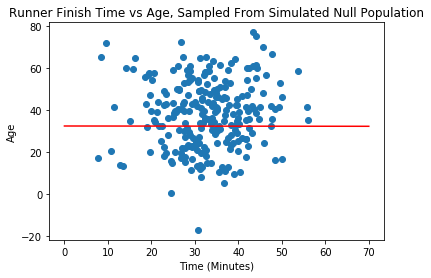

In [22]:
# Fit a least squares regression line for this sample and take note of the slope.
firstsamplereg = sm.ols(formula = "Time ~ Age", data = firstsample).fit()
x = numpy.linspace(0, 70, 500)
y = (nullreg.params[1]*x) + nullreg.params[0]

plt.scatter(firstsample.Time, firstsample.Age)
plt.plot(x, y, 'r')
plt.title("Runner Finish Time vs Age, Sampled From Simulated Null Population")
plt.xlabel("Time (Minutes)")
plt.ylabel("Age")
plt.show()

In [23]:
firstsamplereg.params

Intercept    31.642896
Age           0.027187
dtype: float64

With this procedure, we can set up an iterative process that takes many samples and records their fitted slopes. We can then create a histogram of the null slope values, compare those to our observed slope, and determine how extremem our slope value would be if the null hypothesis were true.

In [24]:
# Find 1000 sample slopes based on samples of size 247 from the generated null distribution
slopes = []
while len(slopes) < 1000:
    sample = nullrunners.sample(n = 247)
    samplereg = sm.ols(formula = "Time ~ Age", data = sample).fit()
    slope = round(samplereg.params[1], 6)
    slopes.append(slope)  
    
# Convert the list of slopes to a data frame
slopes = {'Slopes':slopes}
slopes = pd.DataFrame(slopes)
slopes.head()

,Slopes
0,-0.039892
1,-0.008263
2,-0.010246
3,-0.009811
4,0.011727


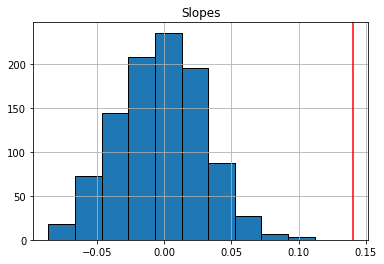

In [27]:
# Plot a histogram of the null slopes, should be normally distributed
slopes.hist(ec = 'black');
plt.axvline(reg.params[1], color = 'r')
plt.show()

In [ ]:
# Calculate a p-value for the observed slope from a fitted normal distribution
